# Pytorch Workflow

Let's explore an example PyTorch end-to-end workflow

In [4]:
What_were_covering = { 
    1 : "data (prepare and load)",
    2 : "build model",
    3 : "fitiing the model to data (training)",
    4 : "making predicitions and evaluating the model (inferncing)",
    5 : "saving and loading the model",
    6 : "Putting it all together"
}

In [35]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check pytorch version
torch.__version__

'2.6.0'

## 1. Data (preparing & Loading)

Data can be alomost anything

* Excel Sheet
* Images of any Kind
* Videos
* Audio
* DNA
* Text

Macahine Learning is a game of two parts
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representations

To showcase this let's create a "known" data

We will use a linear regression formula to make a straight line with known parameters.

In [255]:
# Create known parameters
import random 
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02


X = torch.arange(start, end, step).unsqueeze(dim=-1)
rand_float = torch.rand(X.shape)*0.2   # noise
y = weight * X + bias+rand_float

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3521],
         [0.3147],
         [0.3321],
         [0.3820],
         [0.3984],
         [0.4095],
         [0.4849],
         [0.4570],
         [0.4856],
         [0.5946]]))

In [256]:
len(X), len(y)

(50, 50)

### Spliting data into training and test set

In [257]:
train_split = int(0.8 * len(X))

In [258]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [259]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualize the data

In [533]:
def plot_predicitions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = None
):
    plt.figure(figsize=(10, 7))
        
    # plt training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label = "Training Data")

    # plt test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label = "Testing Data")

    # Are Predictions
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label = "Predictions")

    plt.legend(prop={"size":14})

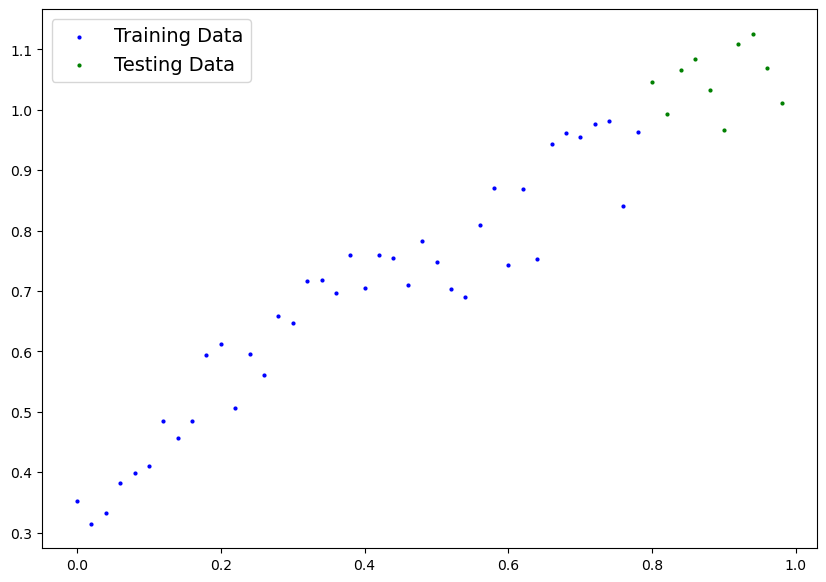

In [261]:
plot_predicitions()

In [273]:
# Create known parameters
import random 
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02


X = torch.arange(start, end, step).unsqueeze(dim=-1)

# adding random ness
'''rand_int = torch.randint(
    low = 1,
    high = 3,
    size = X.shape,
    dtype = X.dtype
)
'''
# rand_float_X = torch.rand(X.shape)


y = weight * X + bias + rand_float

# Spliting the dataset
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


# Visulaziation 
def plot_predicitions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = None
):
    plt.figure(figsize=(10, 7))

    # plt training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label = "Training Data")

    # plt test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label = "Testing Data")

    # Are Predictions
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label = "Predictions")

    plt.legend(prop={"size":14})

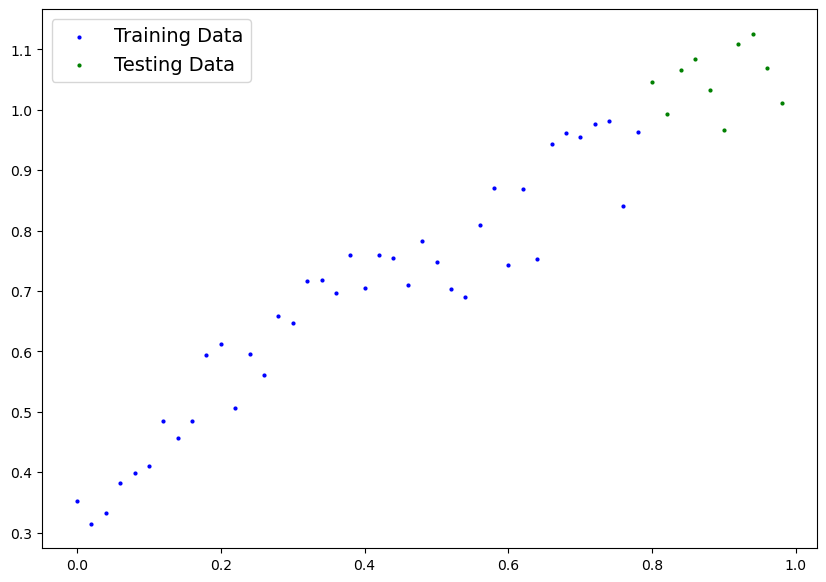

In [263]:
plot_predicitions()

## Build Model

```
`torch.nn.Parameter` is a **Tensor** that PyTorch treats as a learnable weight of a model, so it gets returned by `model.parameters()` and updated by the optimizer during training.[1][2]

## What Parameter is

- `Parameter` is a subclass of `torch.Tensor` designed specifically to hold trainable parameters inside `nn.Module` classes.[3][1]
- When you assign a `Parameter` as an attribute of an `nn.Module`, PyTorch automatically registers it so optimizers (like `torch.optim.SGD`) know to update it.[4][1]

## Why not just use Tensor

- A plain `torch.Tensor` attached to a module attribute is **not** automatically treated as a model parameter and will not appear in `model.parameters()` unless wrapped in `Parameter`.[2]
- Wrapping with `nn.Parameter(...)` is an explicit signal: “this tensor should have gradients and be updated during training.”[1][2]

## Typical usage

- In a custom layer, you often do something like:
  - `self.weight = nn.Parameter(torch.randn(out_features, in_features))`  
  - This ensures `self.weight` is included in gradient computation and optimizer steps.[4][1]
- You can control training by setting `requires_grad` when creating the `Parameter`, for example `nn.Parameter(tensor, requires_grad=False)` for a frozen parameter.[1]

```

In [306]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                 requires_grad = True,
                                                 dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1, 
                                              requires_grad = True, 
                                              dtype = torch.float))

        # Forward method to define the computation in this model
    def forward(self, x: torch.Tensor ) -> torch.Tensor:
        return self.weights * x + self.bias

### Pytorch Model building Essentials

* torch.nn - Contains all the building blocks for computational graphs ( a neural network can be considered a computational graph)
* torch.nn.Parameter - What parameters should the model try and learn and update, often a PyTorch layer from torch.nn will set these for us.
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you have to overwrite forward().
* torch.optim - this where the optimizers in Pytorch live, they will help with gradient descent
* def forward() - All nn.Module subclass require you to overwrite forward(), this method defines what happened in the forward computations                                                                                            

### Checking the content of out PyTorch Model

In [307]:
# Create a random seed
torch.manual_seed(35)

# Create an instance of model
model_0 = LinearRegressionModel()

model_0

LinearRegressionModel()

In [308]:
# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.9674], requires_grad=True),
 Parameter containing:
 tensor([0.6711], requires_grad=True)]

In [309]:
# LList named paramters
model_0.state_dict()

OrderedDict([('weights', tensor([0.9674])), ('bias', tensor([0.6711]))])

### Making Prediction With Model

In [310]:
# Without `torch.inference_mode()`, you will grading function hasn't been turned off 
y_preds = model_0(X_test)
y_preds

tensor([[1.4450],
        [1.4644],
        [1.4837],
        [1.5031],
        [1.5224],
        [1.5418],
        [1.5611],
        [1.5805],
        [1.5998],
        [1.6192]], grad_fn=<AddBackward0>)

In [311]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[1.4450],
        [1.4644],
        [1.4837],
        [1.5031],
        [1.5224],
        [1.5418],
        [1.5611],
        [1.5805],
        [1.5998],
        [1.6192]])

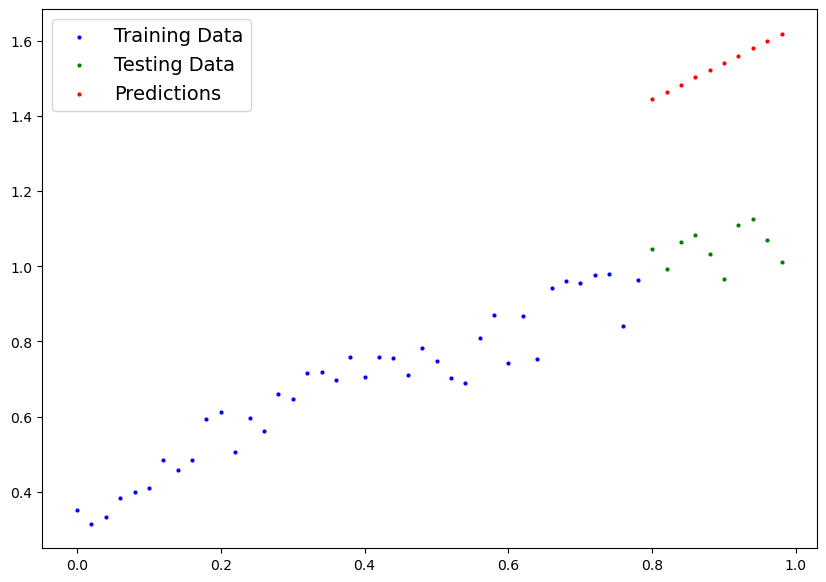

In [312]:
plot_predicitions(predictions=y_preds)

### 3. Train model
The whole idea of training is for a model to move from some unknown parameters (these may be random) to some known parameters.
Or in other words from a poor representation of the data to a better representation of the data.
One way to measure how poor or how wrong your models predictions are is to use a loss function.
* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.
Things we need to train:
* **Loss function**: A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer**: Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function.
* 
And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [313]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.9674], requires_grad=True),
 Parameter containing:
 tensor([0.6711], requires_grad=True)]

In [314]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.9674])), ('bias', tensor([0.6711]))])

### Setting up loss Function and Optimizer

In [315]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an Optimizer
optimizer = torch.optim.SGD( params = model_0.parameters(), # Optimize the parameter wights and bias
                             lr = 0.001 # Learning Rate
                           )

In [251]:
# An epoch is one loop through the data... ( This is one of the hyperparameter we can set)
epochs = 1000

train_loss_values =[]
test_loss_values= []
epoch_count = []
### Training
# 0. loop through the data
for epoch in range(epochs):
    
    # Set the model to training mode
    # train model in PT sets all the parameters that require gradients to require gradients
    model_0.train()
    
    # 1. Forward Pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagations on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer
    optimizer.step() 

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    # Print out the model state_dict
    print(model_0.state_dict())

OrderedDict({'weights': tensor([0.9670]), 'bias': tensor([0.6701])})
OrderedDict({'weights': tensor([0.9666]), 'bias': tensor([0.6691])})
OrderedDict({'weights': tensor([0.9662]), 'bias': tensor([0.6681])})
OrderedDict({'weights': tensor([0.9658]), 'bias': tensor([0.6671])})
OrderedDict({'weights': tensor([0.9654]), 'bias': tensor([0.6661])})
OrderedDict({'weights': tensor([0.9650]), 'bias': tensor([0.6651])})
OrderedDict({'weights': tensor([0.9647]), 'bias': tensor([0.6641])})
OrderedDict({'weights': tensor([0.9643]), 'bias': tensor([0.6631])})
OrderedDict({'weights': tensor([0.9639]), 'bias': tensor([0.6621])})
OrderedDict({'weights': tensor([0.9635]), 'bias': tensor([0.6611])})
OrderedDict({'weights': tensor([0.9631]), 'bias': tensor([0.6601])})
OrderedDict({'weights': tensor([0.9627]), 'bias': tensor([0.6591])})
OrderedDict({'weights': tensor([0.9623]), 'bias': tensor([0.6581])})
OrderedDict({'weights': tensor([0.9619]), 'bias': tensor([0.6571])})
OrderedDict({'weights': tensor([0.

In [316]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

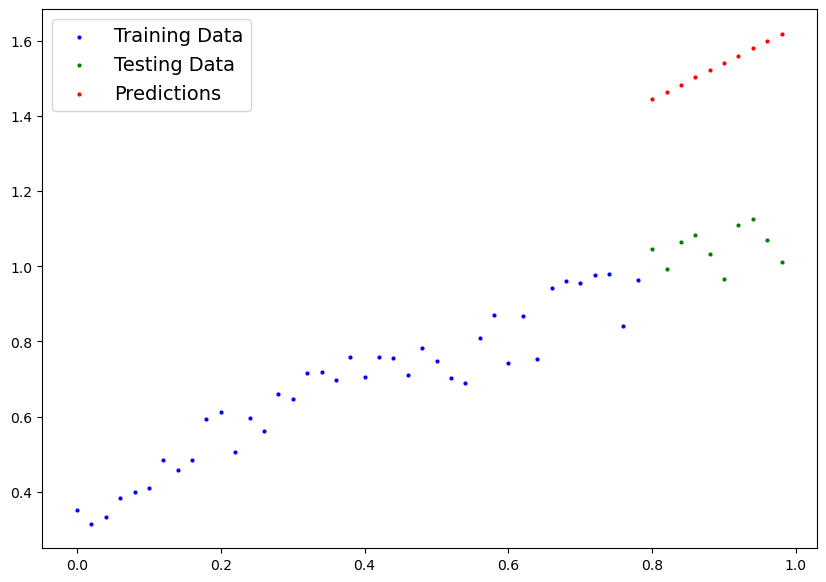

In [317]:
plot_predicitions(predictions = y_preds)

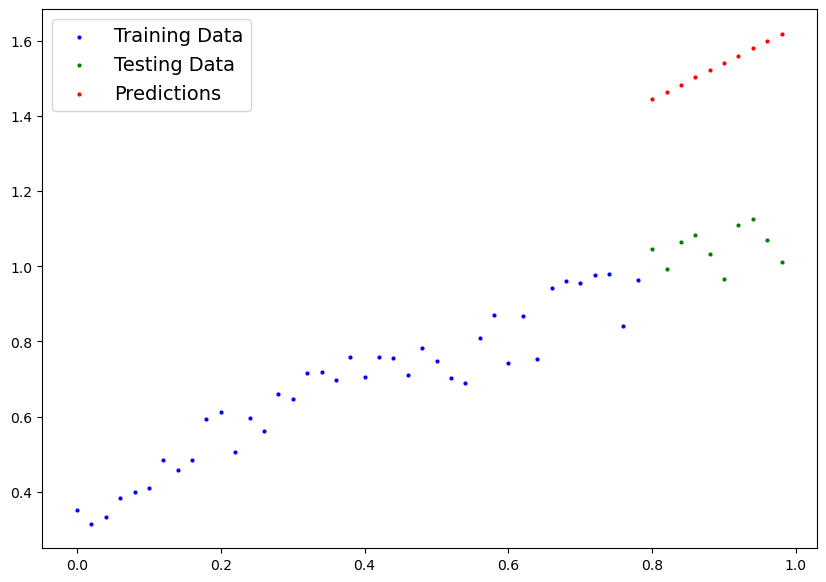

In [318]:
plot_predicitions(predictions = y_preds_new)

In [319]:
### Model Training

epochs = 10000

# Tracking Values
epoch_count = []
loss_values = []
test_loss_values = []

# Training

for epoch in range(epochs):

    model_0.train()


    y_pred = model_0(X_train)


    loss = loss_fn(y_pred, y_train)


    optimizer.zero_grad()

    
    loss.backward()

    
    optimizer.step()

    
    model_0.eval()


    with torch.inference_mode():
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    # 3. Print what's happening
    if epoch % 100 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch : {epoch} | Loss : {loss} | Test Loss : {test_loss}")
        print(model_0.state_dict())

Epoch : 0 | Loss : 0.3683928847312927 | Test Loss : 0.48037776350975037
OrderedDict({'weights': tensor([0.9670]), 'bias': tensor([0.6701])})
Epoch : 100 | Loss : 0.25318443775177 | Test Loss : 0.3456696569919586
OrderedDict({'weights': tensor([0.9280]), 'bias': tensor([0.5701])})
Epoch : 200 | Loss : 0.13797597587108612 | Test Loss : 0.21096153557300568
OrderedDict({'weights': tensor([0.8890]), 'bias': tensor([0.4701])})
Epoch : 300 | Loss : 0.056890953332185745 | Test Loss : 0.09918288886547089
OrderedDict({'weights': tensor([0.8552]), 'bias': tensor([0.3884])})
Epoch : 400 | Loss : 0.047970328480005264 | Test Loss : 0.06703083217144012
OrderedDict({'weights': tensor([0.8444]), 'bias': tensor([0.3647])})
Epoch : 500 | Loss : 0.04762573540210724 | Test Loss : 0.062374942004680634
OrderedDict({'weights': tensor([0.8441]), 'bias': tensor([0.3592])})
Epoch : 600 | Loss : 0.04743926599621773 | Test Loss : 0.06065351516008377
OrderedDict({'weights': tensor([0.8450]), 'bias': tensor([0.3555]

### Plot the loss Curve

In [320]:
# Currently values are in tensor need to convert to numpy
loss_values, test_loss_values

([tensor(0.3684, grad_fn=<MeanBackward0>),
  tensor(0.2532, grad_fn=<MeanBackward0>),
  tensor(0.1380, grad_fn=<MeanBackward0>),
  tensor(0.0569, grad_fn=<MeanBackward0>),
  tensor(0.0480, grad_fn=<MeanBackward0>),
  tensor(0.0476, grad_fn=<MeanBackward0>),
  tensor(0.0474, grad_fn=<MeanBackward0>),
  tensor(0.0474, grad_fn=<MeanBackward0>),
  tensor(0.0473, grad_fn=<MeanBackward0>),
  tensor(0.0473, grad_fn=<MeanBackward0>),
  tensor(0.0473, grad_fn=<MeanBackward0>),
  tensor(0.0473, grad_fn=<MeanBackward0>),
  tensor(0.0473, grad_fn=<MeanBackward0>),
  tensor(0.0473, grad_fn=<MeanBackward0>),
  tensor(0.0473, grad_fn=<MeanBackward0>),
  tensor(0.0473, grad_fn=<MeanBackward0>),
  tensor(0.0473, grad_fn=<MeanBackward0>),
  tensor(0.0473, grad_fn=<MeanBackward0>),
  tensor(0.0473, grad_fn=<MeanBackward0>),
  tensor(0.0473, grad_fn=<MeanBackward0>),
  tensor(0.0473, grad_fn=<MeanBackward0>),
  tensor(0.0473, grad_fn=<MeanBackward0>),
  tensor(0.0473, grad_fn=<MeanBackward0>),
  tensor(0.

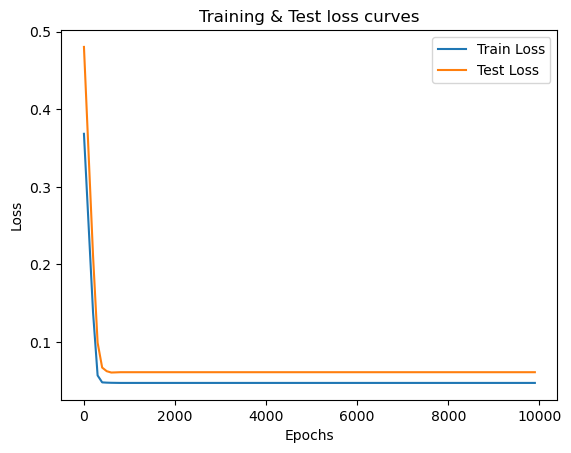

In [321]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training & Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [322]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

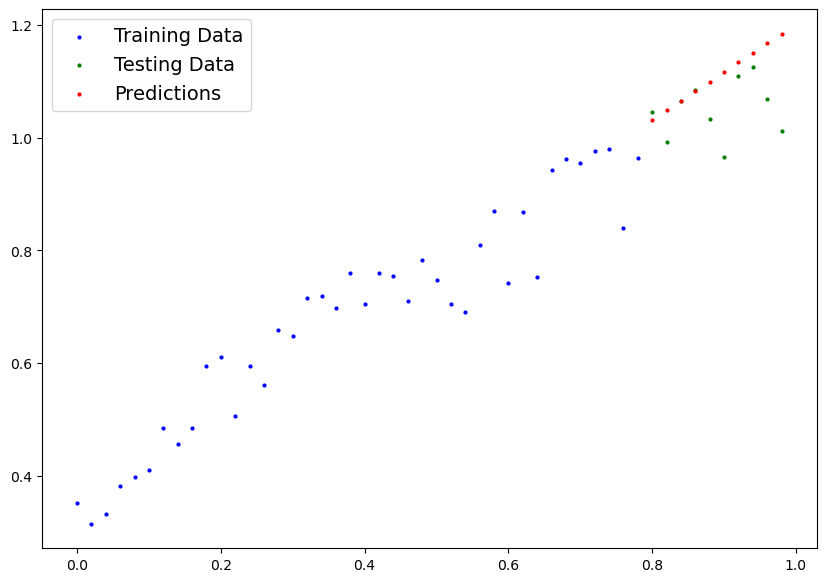

In [323]:
plot_predicitions(predictions = y_preds_new)

In [324]:
# Saving the Model
torch.save(model_0.state_dict(), "01_pytorch_workflow_model.pth")

In [326]:
!pwd

/home/sagemaker-user/PyTorch/Zero to One


In [329]:
# Model loaded back
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f="01_pytorch_workflow_model.pth"))

<All keys matched successfully>

In [330]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.8496])), ('bias', tensor([0.3521]))])

In [334]:
# Testing the loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[1.0318],
        [1.0488],
        [1.0658],
        [1.0828],
        [1.0998],
        [1.1168],
        [1.1338],
        [1.1508],
        [1.1678],
        [1.1848]])

In [337]:
# Testing the loaded model
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[1.0318],
        [1.0488],
        [1.0658],
        [1.0828],
        [1.0998],
        [1.1168],
        [1.1338],
        [1.1508],
        [1.1678],
        [1.1848]])

In [338]:
# Predictions from both loaded and earlier model is same
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

In [458]:
# Import Libraries and Modules
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check Pytorch Version
torch.__version__

'2.6.0'

```
Creating device agnostic code.
This means code will leverage GPU if it is available otherwise CPU
```

In [459]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [460]:
!nvidia-smi

Mon Jan 12 08:09:40 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.105.08             Driver Version: 580.105.08     CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A10G                    On  |   00000000:00:1E.0 Off |                    0 |
|  0%   32C    P0             58W /  300W |    1255MiB /  23028MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### 6.1 Data

In [461]:
# Create some data using linear regression with some noise

weight = 0.7
bias = 0.3

# Create range values 
start = 0
end = 35
step = 0.02

# Create Feature and Labels
X = torch.arange(start, end, step).unsqueeze(dim=1)

noise = torch.rand(X.shape)*12.3

y = weight * X + bias + noise

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[ 3.5064],
         [ 0.3553],
         [ 0.5825],
         [ 2.8040],
         [ 2.9650],
         [ 2.7984],
         [ 6.5923],
         [ 4.0283],
         [ 4.9376],
         [10.7953]]))

### Split the data

In [462]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_test), len(X_train)

(350, 1400)

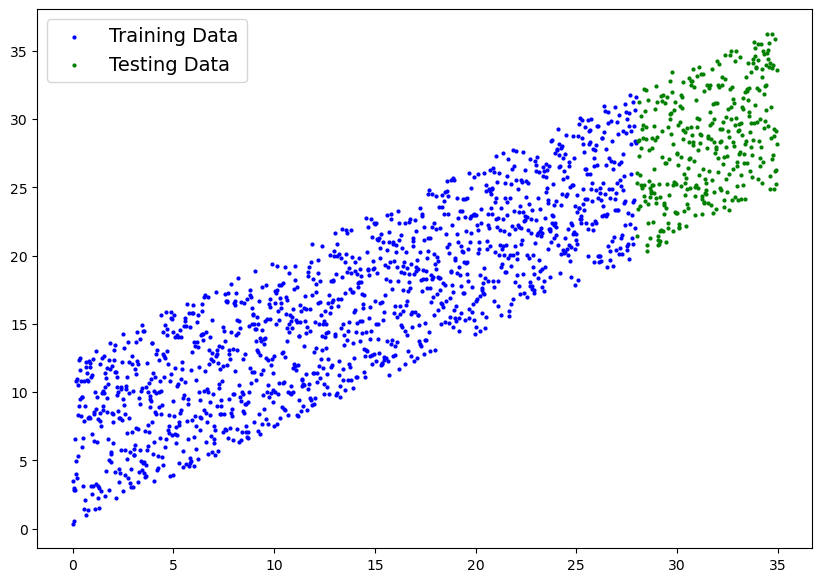

In [463]:
### Plot the data
plot_predicitions(X_train, y_train, X_test, y_test)

### 6.2 Building PyTorch Linear Model

In [482]:
# Create a linear model by subclassing nn Module

class LinearRegressionModelv2(nn.Module):
    def __init__(self):
        super().__init__()

        # Use nn.Linear() for creating model parameters
        self.linear_layer = nn.Linear(in_features=1, out_features= 1) # in feature is for X, and bias is set by default https://docs.pytorch.org/docs/stable/generated/torch.nn.Linear.html

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


# Set the manual seed
torch.manual_seed(35)
model_1 = LinearRegressionModelv2()
model_1, model_1.state_dict()

(LinearRegressionModelv2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.4759]])),
              ('linear_layer.bias', tensor([-0.7049]))]))

In [483]:
# Checking the model current device
next(model_1.parameters()).device

device(type='cpu')

In [484]:
# Sending the parameters to GPU
model_1.to(device)

LinearRegressionModelv2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [485]:
# Model on GPU device
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training 

We need
* Loss Function - Calculate the loss ( how wrong the model is)
* Optimizer - ( Update the parameters to perform better on next iteration)
* training Loop
* eval() - Testing Loop

In [489]:
# Set up loss function
loss_fn = nn.L1Loss()

# Setup our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr=0.01)

In [490]:
# Sending the data to GPU
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [496]:
# Writing the training loop

epochs_values = []
loss_values = []
test_loss_values = []

epochs = 10000

for epoch in range(epochs):

    # Starting the training with calling train 
    model_1.train()

    # 1. Doing the forward pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Setting the optimizer to zero_grad()
    optimizer.zero_grad()

    # 4. Going back to computational - backpropagation
    loss.backward()
    
    # 5. Optimizer step - updating the weights and bias
    optimizer.step()

    ### Testing
    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)


    # Print out what's happening
    if epoch % 1000 == 0 :
        print(f" Epoch : {epoch} | Loss : {loss} | Test Loss : {test_loss}")

 Epoch : 0 | Loss : 3.001317024230957 | Test Loss : 2.944535732269287
 Epoch : 1000 | Loss : 3.0012080669403076 | Test Loss : 2.944688081741333
 Epoch : 2000 | Loss : 3.001150131225586 | Test Loss : 2.9447498321533203
 Epoch : 3000 | Loss : 3.001133918762207 | Test Loss : 2.944798469543457
 Epoch : 4000 | Loss : 3.0011205673217773 | Test Loss : 2.944908857345581
 Epoch : 5000 | Loss : 3.0011138916015625 | Test Loss : 2.9449462890625
 Epoch : 6000 | Loss : 3.001112461090088 | Test Loss : 2.944958209991455
 Epoch : 7000 | Loss : 3.001117706298828 | Test Loss : 2.9450361728668213
 Epoch : 8000 | Loss : 3.001115322113037 | Test Loss : 2.944937229156494
 Epoch : 9000 | Loss : 3.001126527786255 | Test Loss : 2.9449825286865234


In [497]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6729]], device='cuda:0')),
             ('linear_layer.bias', tensor([6.9491], device='cuda:0'))])

### 6.4 Making and evaluating Predictions

In [508]:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test).cpu()
y_preds

tensor([[25.7910],
        [25.8045],
        [25.8179],
        [25.8314],
        [25.8449],
        [25.8583],
        [25.8718],
        [25.8852],
        [25.8987],
        [25.9121],
        [25.9256],
        [25.9391],
        [25.9525],
        [25.9660],
        [25.9794],
        [25.9929],
        [26.0064],
        [26.0198],
        [26.0333],
        [26.0467],
        [26.0602],
        [26.0737],
        [26.0871],
        [26.1006],
        [26.1140],
        [26.1275],
        [26.1409],
        [26.1544],
        [26.1679],
        [26.1813],
        [26.1948],
        [26.2082],
        [26.2217],
        [26.2352],
        [26.2486],
        [26.2621],
        [26.2755],
        [26.2890],
        [26.3024],
        [26.3159],
        [26.3294],
        [26.3428],
        [26.3563],
        [26.3697],
        [26.3832],
        [26.3967],
        [26.4101],
        [26.4236],
        [26.4370],
        [26.4505],
        [26.4639],
        [26.4774],
        [26.

In [ ]:
y_preds = y_preds.to('cpu')

In [511]:
print(f"test_data shape: {X_test.shape}")
print(f"predictions shape: {y_preds.shape}")

test_data shape: torch.Size([350, 1])
predictions shape: torch.Size([350, 1])


In [530]:
train_data=X_train.cpu().numpy(),
train_labels=y_train.cpu().numpy(),
test_data=X_test.cpu().numpy(), 
test_labels=y_test.cpu().numpy(),
predictions=y_preds.cpu().numpy()  

In [531]:
print(f"X_train device: {X_train.device}")
print(f"X_test device: {X_test.device}")
print(f"y_train device: {y_train.device}")
print(f"y_test device: {y_test.device}")
print(f"y_preds device: {y_preds.device}")

X_train device: cpu
X_test device: cpu
y_train device: cpu
y_test device: cpu
y_preds device: cpu


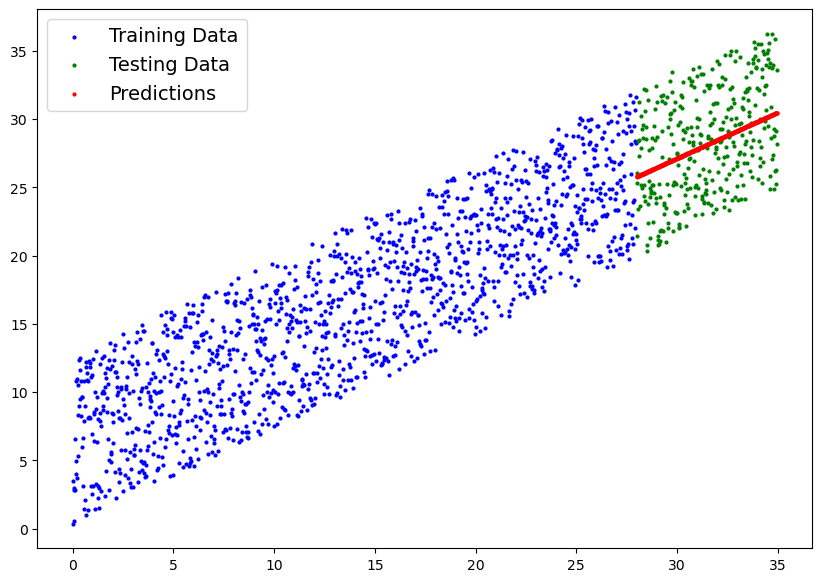

In [534]:
plot_predicitions(predictions=y_preds.numpy())

### 7. Saving and Loading a Model

In [537]:
Saved_model_1 = torch.save(model_1.state_dict(), "model_1.pth")

In [538]:
Saved_model_1 

In [540]:
from pathlib import Path

# 1. Create Model Directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create Model Save Path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. Saving the model state dict
print(f"Saving Model to : {MODEL_SAVE_PATH}")
torch.save(model_1.state_dict(), MODEL_SAVE_PATH)

Saving Model to : models/01_pytorch_workflow_model_1.pth


In [541]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6729]], device='cuda:0')),
             ('linear_layer.bias', tensor([6.9491], device='cuda:0'))])

### 7.1 Load the Model

In [542]:
# Creating a new instance of LinearRegressionModelv2
loaded_model_1 = LinearRegressionModelv2()

# Load the saved model_1 state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelv2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [544]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [548]:
# Sending the data to GPU
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
y_preds = y_preds.to(device)

In [549]:
# Evaluate the loaded modelabs
loaded_model_1.eval()

with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        